<a href="https://colab.research.google.com/github/PingPingE/Learn_ML_DL/blob/main/Practice/Hands_On_ML/ch17_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
#https://github.com/PingPingE/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train1 = generate_3d_data(60)
X_train1 = X_train1 - X_train1.mean(axis=0, keepdims=0)

# 오토인코더와 GAN을 사용한 표현 학습과 생성적 학습
- <strong>오토인코더</strong>: 어떤 지도 없이도 잠재 표현 또는 입력 데이터의 밀집 표현(코딩)을 학습할 수 있는 인공 신경망
  - 강력한 특성 추출기처럼 작동하므로 심층 신경망의 비지도 사전훈련에 사용될 수 있다.
  - 훈련데이터와 매우 비슷한 새로운 데이터를 생성할 수 있다.(하지만 흐릿하고 실제 이미지 같진 않음)


- <strong>GAN(Generative Adversarial Networks)</strong>: 다음과 같은 일을 할 수 있는 인공 신경망
  - 초해상도(이미지 해상도 높이기)
  - 강력한 이미지 편집(배경 바꾸기)
  - 간단한 스케치를 실제 같은 이미지로 바꾸기
  - 동영상에서 다음 프레임 예측하기
  - (텍스트, 오디오, 시계열 같은) 여러 다른 종류의 데이터 생성
  - 다른 모델의 취약점을 식별하고 개선하기 


# 오토인코더

  <img src="https://gaussian37.github.io/assets/img/dl/concept/autoencoder1/autoencoder.png" width=50% height=50%/>

- 두 부분으로 구성
  - <strong>인코더(또는 인지 네트워크)</strong>: 입력을 내부 표현으로 바꿈
  - <strong>디코더(또는 생성 네트워크)</strong>: 내부 표현을 출력으로 바꿈

- <strong>특징</strong>
  - 출력층의 뉴런 수가 입력 개수와 동일함
  - 입력을 재구성하므로 출력을 종종 '재구성(reconstruction)'이라고 부름
  - 비용함수는 재구성이 입력과 다를 때 모델에 벌점을 부과하는 '재구성 손실'을 포함함
  - 내부의 표현이 입력 데이터보다 저차원이므로 이런 오토인코더를 과소완전(undercomplete)'이라고 함
    - 과소완전 선형 오토인코더는 입력과 똑같은 것을 출력하기 위한 다른 방법을 찾아야한다.
   - 이는 <strong>입력 데이터에서 중요하지 않은 것은 버리고 가장 중요한 특성을 학습</strong>하도록 만든다.

*과소완전: undercomplete의 대수학적 정의를 보면 기저(basis)보다 적은 개수로 표현되는 것을 말함.(반대는 overcomplete) 
<br>-> underfitting/overfitting이 과소적합/과대적합으로 불리므로 과소완전/과대완전으로 번역했다고함

<br><br><br><br>

## 과소완전 선형 오토인코더로 PCA 수행하기

- 오토인코더가 선형 활성화 함수만 사용하고, 비용 함수가 MSE라면, 이는 결국 PCA를 수행하는 것으로 볼 수 있다.

In [3]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])#activation함수가 없음(즉, 선형)
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder=keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [4]:
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 2)                 8         
_________________________________________________________________
sequential_4 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [13]:
history=autoencoder.fit(X_train1, X_train1, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 7ms/step - loss: 0.7440
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5335
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.4274
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3656
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3234
Epoch 6/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2940
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2712
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2528
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2371
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2213
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2069
Epoch 12/20
2/2 [==============================] - 0s 12ms/step - loss: 0.1928
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 0

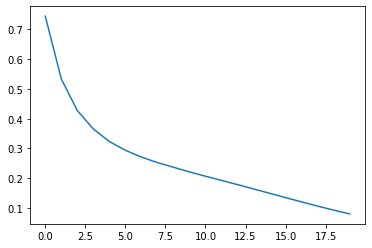

In [23]:
plt.plot(history.history['loss'])

### 원본과 비교

#### 원본

In [65]:
X_train1.shape

(60, 3)

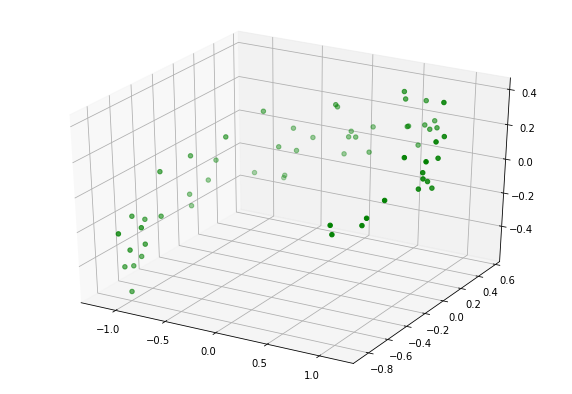

In [63]:
#https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_train1[:,0], X_train1[:,1], X_train1[:,2], color = "green")

#### 인코딩 후

In [30]:
codings= encoder.predict(X_train1)
codings.shape

(60, 2)

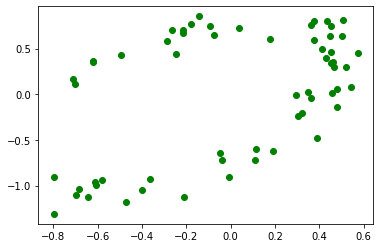

In [64]:
plt.scatter(codings[:,0], codings[:,1], color = "green")

-----------
- PCA처럼 데이터에 있는 분산이 가능한 많이 보존되도록 데이터를 투영할 최상의 2D 평면을 찾음

#### 디코딩 후

In [67]:
output_ = decoder.predict(codings)
output_.shape

(60, 3)

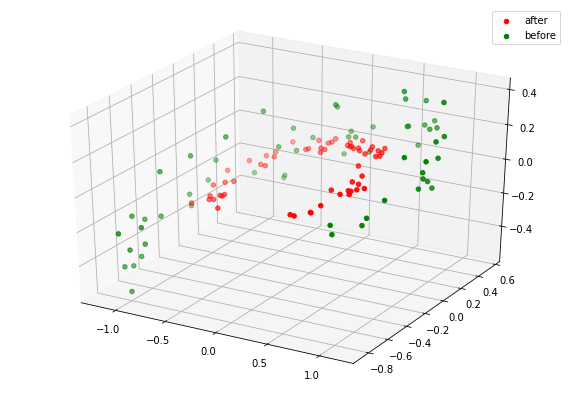

In [69]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(output_[:,0], output_[:,1], output_[:,2], color = "red", label='after')
ax.scatter3D(X_train1[:,0], X_train1[:,1], X_train1[:,2], color = "green", label='before')
plt.legend()

------
- 원본과 많이 다른데

## 적층 오토인코더
- 은닉층이 여러 개인 오토인코더를 '적층 오토인코더' 혹은 '심층 오토인코더'라고 함
- 층을 더 추가하면 오토인코더가 더 복잡한 코딩을 학습할 수 있다.
- 그러나 오토인코더가 너무 강력해지지 않도록 주의해야한다. -> 일반화 X

In [105]:
# 패션 MNIST 데이터셋 로드  + 정규화
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [106]:
stacked_encoder = keras.models.Sequential([
                                           keras.layers.Flatten(input_shape=[28,28]),
                                           keras.layers.Dense(100, activation='selu'),
                                           keras.layers.Dense(30, activation='selu'),
])

stacked_decoder = keras.models.Sequential([
                                           keras.layers.Dense(100, activation='selu', input_shape=[30]),
                                           keras.layers.Dense(28*28, activation='sigmoid'),
                                           keras.layers.Reshape([28,28])
])

[오토인코더 관련 예전 코드](https://github.com/PingPingE/Deeplearning_with_Keras/blob/master/day10.ipynb)
- 이때는 input으로 넣기 전에 reshape를 해주고, output도 reshape를 해서 시각화했는데, <br>처음에 Flatten층, 마지막에 Reshape층을 넣으면 그럴 필요가 X

In [107]:
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss='binary_crossentropy', optimizer= keras.optimizers.SGD(learning_rate=1.5))

In [108]:
history= stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3369 - val_loss: 0.3278
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3059 - val_loss: 0.3028
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2994 - val_loss: 0.2990
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2955 - val_loss: 0.2949
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2929 - val_loss: 0.2931
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2912 - val_loss: 0.2912
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2898 - val_loss: 0.2913
Epoch 8/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2887 - val_loss: 0.2891
Epoch 9/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2878 - val_loss: 0.2891
Epoch 10/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.287

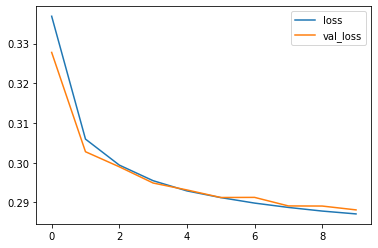

In [109]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#### 원본 이미지와 비교

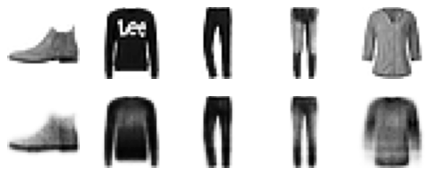

In [110]:
def plot_image(image):
  plt.imshow(image, cmap='binary')
  plt.axis('off')

def show_reconstructions(model, n_images=5):
  reconstructions = model.predict(X_test[:n_images])
  fig= plt.figure(figsize=(n_images*1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2,n_images, 1+image_index)
    plot_image(X_test[image_index])
    plt.subplot(2,n_images, 1+n_images+image_index)
    plot_image(reconstructions[image_index])
  
show_reconstructions(stacked_ae)

--------
재구성된 이미지를 식별할 수는 있지만 정보를 조금 많이 잃었음<br>
이런 경우, 
- 모델을 더 오래 훈련하거나
- 인코더와 디코더의 층을 늘리거나
- 코딩의 사이즈를 늘려본다
- 주의: 근데 또 너무 원본 이미지랑 같아도 X

#### 인코딩 후 t-SNE로 시각화

In [136]:
X_valid_compressed.shape

(5000, 28, 28)

In [137]:
from sklearn.manifold import TSNE
#오토인코더의 인코더 모델로 차원을 줄이고(30차원) 시각화를 위해  t-SNE을 통해 차원을 2차원까지 줄이기
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne= TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

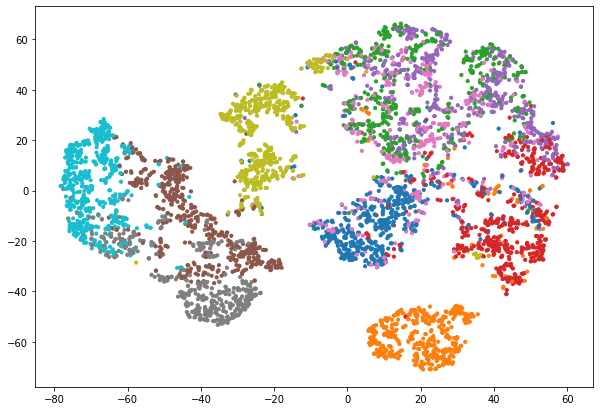

In [144]:
plt.figure(figsize=(10,7))
plt.scatter(X_valid_2D[:,0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")

-------
- 인코더로 먼저 차원 축소 후, t-SNE알고리즘이 식별한 클러스터가 클래스와 잘 매칭되는 것을 확인

# GAN
<img src="https://kjhov195.github.io/post_img/200309/image.png" width=50%/>

- 다음 두 개의 신경망으로 구성
  - <strong>생성자</strong>: 훈련 데이터와 비슷해 보이는 데이터를 생성하는 신경망
  - <strong>판별자</strong>: 데이터와 진짜 데이터를 구별하는 신경망